## Classifying the type of URLs (Malicious or Benign) using KNN Algorithm

<div style="text-align: right"> By Smit Doshi </div>

#### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Reading the data from the provided CSV file

In [2]:
data = pd.read_csv("Dataset.csv")
data.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,APP_PACKETS,DNS_QUERY_TIMES,Type
0,16,7,263.0,7,0,2,700,9,10,9,2.0,1
1,16,6,15087.0,17,7,4,1230,17,19,17,0.0,0
2,16,6,324.0,0,0,0,0,0,0,0,0.0,0
3,17,6,162.0,31,22,3,3812,39,37,39,8.0,0
4,17,6,124140.0,57,2,5,4278,61,62,61,4.0,0


#### Replacing all N/A values with 0

In [3]:
data.fillna(0,inplace=True)

#### Importing standard scaler

In [4]:
from sklearn.preprocessing import StandardScaler

#### Creating Instance of the scaler

In [5]:
scaler = StandardScaler()

#### Fitting our data into scaler instance

In [6]:
scaler.fit(data.drop('Type',axis=1))

StandardScaler()

#### Transforming our data to standardized data

In [7]:
scaled_features = scaler.transform(data.drop('Type',axis=1))
scaled_features

array([[-1.48691313e+00, -9.03952494e-01, -2.22791697e-01, ...,
        -1.88557100e-01, -2.29245098e-01, -8.95014816e-02],
       [-1.48691313e+00, -1.12379947e+00,  3.17093588e-01, ...,
         5.47138790e-03, -3.70089638e-02, -7.72165887e-01],
       [-1.48691313e+00, -1.12379947e+00, -2.20570096e-01, ...,
        -4.04144309e-01, -4.45510749e-01, -7.72165887e-01],
       ...,
       [ 5.22867484e+00,  5.03191581e+00,  9.19107284e-02, ...,
         1.51458185e+00,  1.64505721e+00,  5.93162924e-01],
       [ 6.42659053e+00,  5.03191581e+00, -2.32370072e-01, ...,
        -4.04144309e-01, -4.45510749e-01, -7.72165887e-01],
       [ 6.97109766e+00,  6.35099766e+00,  6.57544725e-01, ...,
         1.99499876e-01,  1.55227170e-01,  1.27582733e+00]])

#### Converting it into dataframe

In [8]:
df_feat = pd.DataFrame(scaled_features,columns=data.columns[:-1])
df_feat.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,APP_PACKETS,DNS_QUERY_TIMES
0,-1.486913,-0.903952,-0.222792,-0.228728,-0.251031,-0.313241,-0.040731,-0.229245,-0.188557,-0.229245,-0.089501
1,-1.486913,-1.123799,0.317094,0.018249,0.070053,0.277423,-0.031272,-0.037009,0.005471,-0.037009,-0.772166
2,-1.486913,-1.123799,-0.220570,-0.401611,-0.251031,-0.903904,-0.053223,-0.445511,-0.404144,-0.445511,-0.772166
3,-1.450613,-1.123799,-0.226470,0.364017,0.758088,-0.017909,0.014806,0.491640,0.393528,0.491640,1.958492
4,-1.450613,-1.123799,4.288769,1.006157,-0.159292,0.572754,0.023122,1.020290,0.932496,1.020290,0.593163


#### Importing required modules

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#### Splitting the dataset into training and test sets
##### Here, the training set is 80% of the set and test set is 20% of the original dataset

In [10]:
X = df_feat
y = data['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

#### Instantiating KNN algorithm for k = 3

In [11]:
knn = KNeighborsClassifier(n_neighbors=3)

#### Fitting the model

In [12]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

#### Predicting the values

In [13]:
pred = knn.predict(X_test)

#### Importing metrics

In [14]:
from sklearn.metrics import classification_report,confusion_matrix

In [15]:
print(confusion_matrix(y_test,pred))
print("-----------")
print(classification_report(y_test,pred))

[[300  15]
 [ 10  32]]
-----------
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       315
           1       0.68      0.76      0.72        42

    accuracy                           0.93       357
   macro avg       0.82      0.86      0.84       357
weighted avg       0.93      0.93      0.93       357



#### Checking the performance for variety of Ks to determine the best K (accuracy wise)

In [16]:
error_rate =[]
for i in range(1,140):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

#### Plotting a figure to visualize the performance

Text(0, 0.5, 'Error Rate')

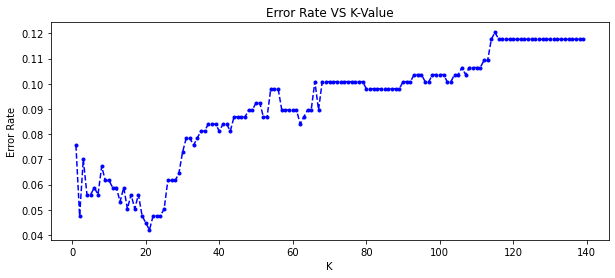

In [17]:
plt.figure(figsize=(10,4))
plt.plot(range(1,140),error_rate,color='blue',linestyle='--',marker='.')
plt.title("Error Rate VS K-Value")
plt.xlabel("K")
plt.ylabel('Error Rate')

#### According to performance check for a variety of Ks- I think the model predicts or performs well for K = 20
#### Accuracy = 96 %

In [18]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train,y_train)
pred= knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print("-----------")
print(classification_report(y_test,pred))

[[313   2]
 [ 14  28]]
-----------
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       315
           1       0.93      0.67      0.78        42

    accuracy                           0.96       357
   macro avg       0.95      0.83      0.88       357
weighted avg       0.95      0.96      0.95       357

